<a href="https://colab.research.google.com/github/prteek/truck-parking-model/blob/master/CNN_example/Simple_Traffic_Signal_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import pickle
import pandas as pd
import csv
import random
np.random.seed(0)

Using TensorFlow backend.


In [ ]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

Cloning into 'german-traffic-signs'...
remote: Counting objects: 6, done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 0 (delta 0)
Unpacking objects: 100% (6/6), done.


In [ ]:
#to see files within the folder
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [ ]:
# Assingn the train,test and validation data and the CSV file
with open('german-traffic-signs/train.p','rb') as f:
  train_data = pickle.load(f)
with open('german-traffic-signs/test.p','rb') as f:
  test_data = pickle.load(f)
with open('german-traffic-signs/valid.p','rb') as f:
  val_data = pickle.load(f)

#print(type(train_data))
#print(list(train_data))
#print(train_data['coords'])
#print(train_data['labels'])
#print(train_data['features'])
#print(train_data['sizes'])

x_train,y_train = train_data['features'],train_data['labels']
x_val,y_val = val_data['features'],val_data['labels']
x_test,y_test = test_data['features'],test_data['labels']
print("Training data set shape -", x_train.shape)
print("Training lable  shape -", y_train.shape)
print("Validation data set shape -", x_val.shape)
print("Test data set shape -",x_test.shape)


Training data set shape - (34799, 32, 32, 3)
Training lable  shape - (34799,)
Validation data set shape - (4410, 32, 32, 3)
Test data set shape - (12630, 32, 32, 3)


In [ ]:
# lets analyse the CSV data
csv_data = pd.read_csv('german-traffic-signs/signnames.csv')
print(csv_data)
class_numbers = max(csv_data['ClassId'])+1 #class_numbers = csv_data.shape[0]
class_names = csv_data['SignName']

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vechiles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

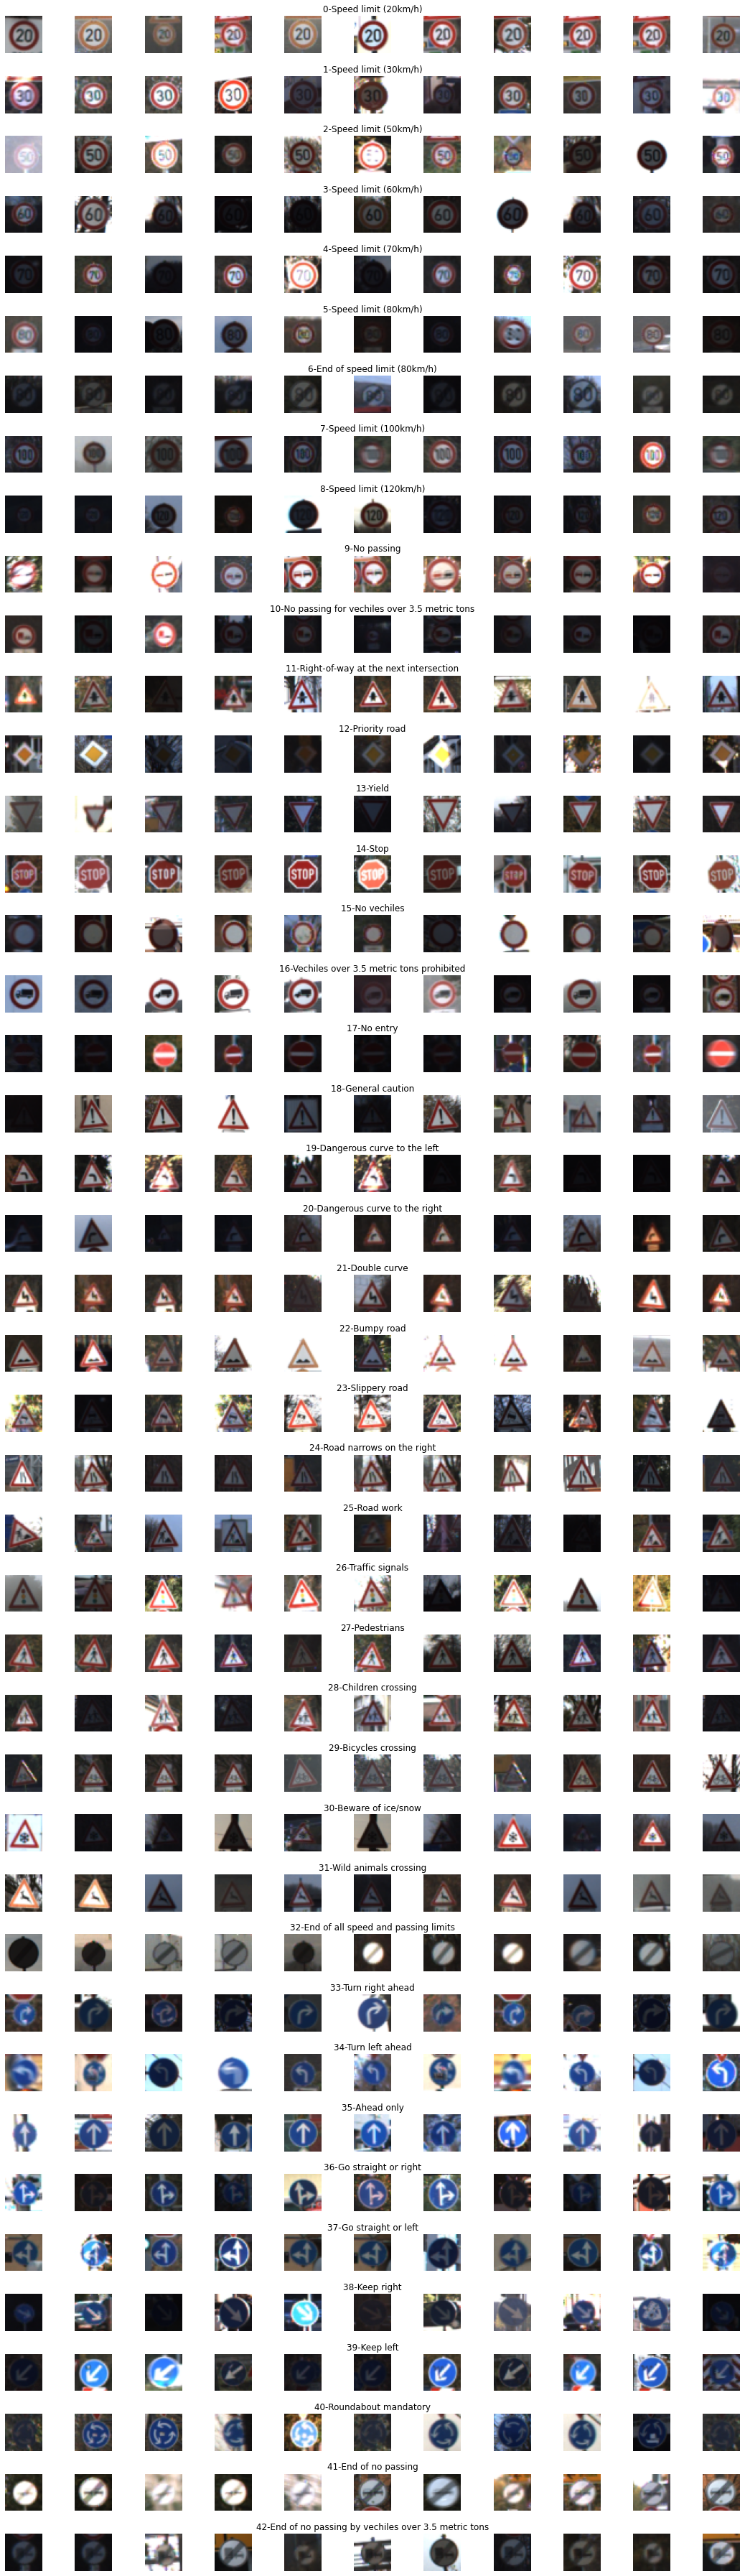

In [ ]:
no_random_images = 11

fig, axs = plt.subplots(nrows=class_numbers, ncols=no_random_images, figsize=(15,50))
fig.tight_layout()

for i in range(no_random_images):
    for j in range(class_numbers):
        x_selected = x_train[y_train == j]
        axs[j][i].imshow(x_selected[np.random.randint(len(x_selected)-1)], cmap=plt.get_cmap('gray'))
        axs[j][i].axis("off")
        axs[j][int(np.floor((no_random_images)/2))].set_title(str(j) + "-" + class_names[j])


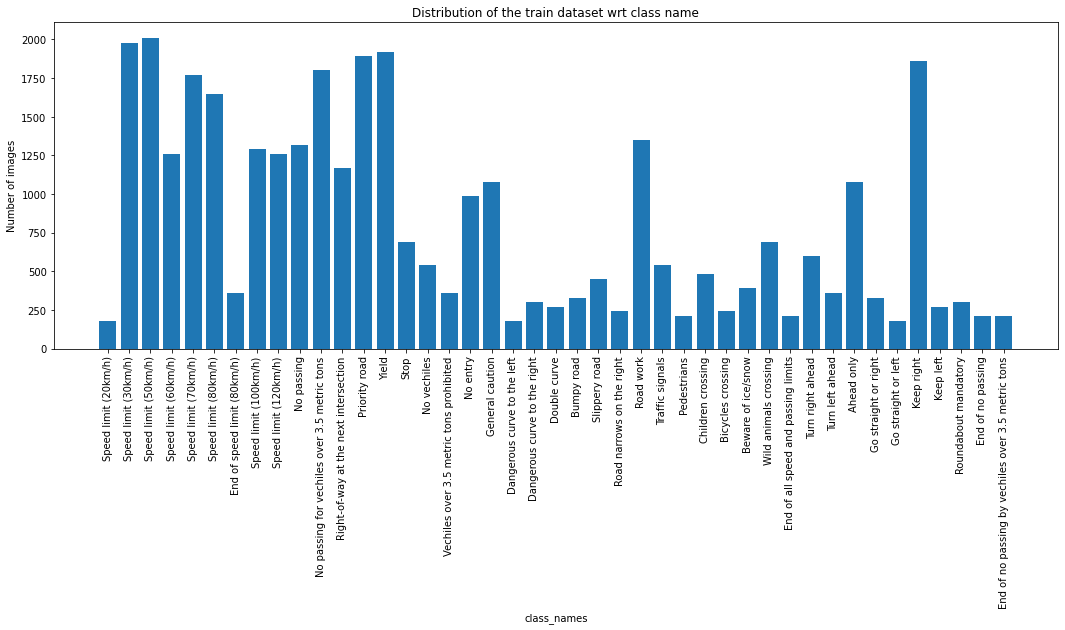

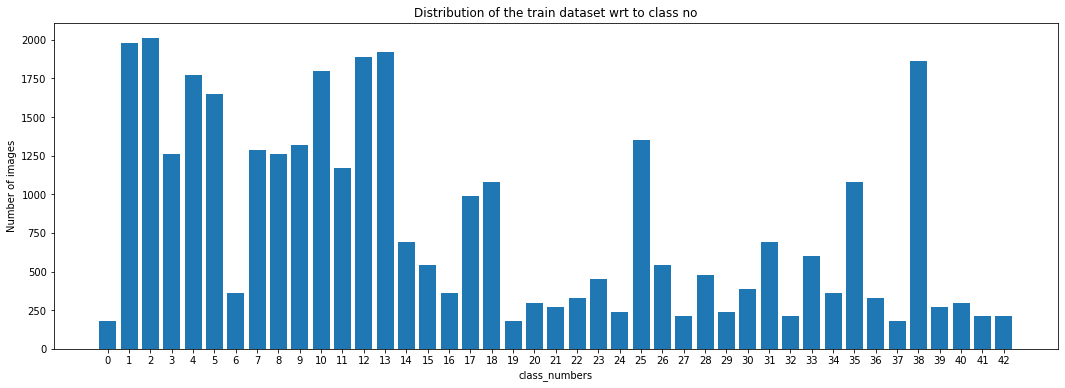

In [ ]:
# find the no of images per class and plot a ber plot
no_images_per_class = []
for i in range(class_numbers):
    x_selected = x_train[y_train == i]
    no_images_per_class.append(len(x_selected))

plt.figure(figsize=(18, 6))
plt.bar(class_names, no_images_per_class)
plt.xticks(class_names, rotation=90)
plt.title("Distribution of the train dataset wrt class name")
plt.xlabel("class_names")
plt.ylabel("Number of images")
plt.show()


plt.figure(figsize=(18, 6))
plt.bar(range(0, class_numbers), no_images_per_class)
plt.title("Distribution of the train dataset wrt to class no")
plt.xticks(range(0, class_numbers))
plt.xlabel("class_numbers")
plt.ylabel("Number of images")
plt.show()

The selected random image is of the class 38 and is labeled as Keep right


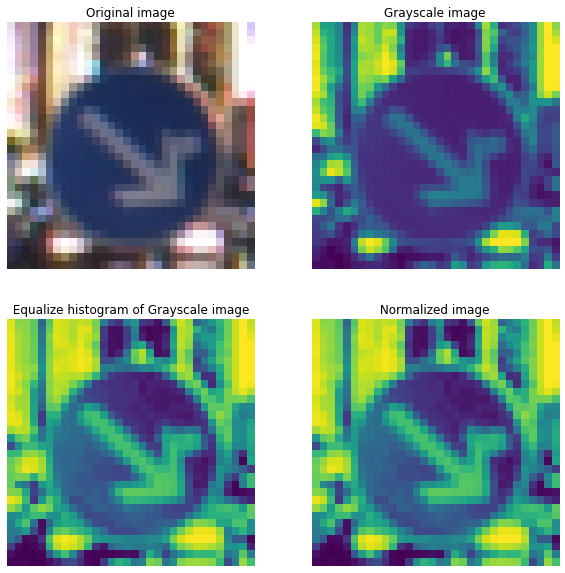

In [ ]:
#preprocessing function[ grayscale,equilize and normalize] -  using cvtColor and  equalizeHist [openCV functions]


def grayscale(img):
  img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  return img

def equalize(img):
  img = cv2.equalizeHist(img)
  return img

def normalize(img):
  img = img/255
  return img

# testing a random image
random_image_no = np.random.randint((len(x_train)-1))
testimage_raw = x_train[random_image_no]

testimage_grayscale = grayscale(testimage_raw)
testimage_equalize = equalize(testimage_grayscale)
testimage_normalize = normalize(testimage_equalize)

fig, axs = plt.subplots(2, 2,figsize=(10,10))
axs[0][0].imshow(testimage_raw)
axs[0][0].axis("off")
axs[0][0].set_title("Original image")
axs[0][1].imshow(testimage_grayscale)
axs[0][1].axis("off")
axs[0][1].set_title("Grayscale image")
axs[1][0].imshow(testimage_equalize)
axs[1][0].axis("off")
axs[1][0].set_title(" Equalize histogram of Grayscale image ")
axs[1][1].imshow(testimage_normalize)
axs[1][1].axis("off")
axs[1][1].set_title(" Normalized image ")               
print("The selected random image is of the class", y_train[random_image_no], "and is labeled as", str(class_names[y_train[random_image_no]]) )

(34799, 32, 32)


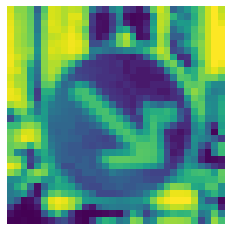

In [ ]:
# preprocessing all images using the above function and testing

def preprocessing(img):
  img = grayscale(img)
  img = equalize(img)
  img = img/255
  return img


x_train = np.array(list(map(preprocessing,x_train)))
x_val = np.array(list(map(preprocessing,x_val)))
x_test = np.array(list(map(preprocessing,x_test)))
plt.imshow(x_train[random_image_no])
plt.axis('off')
print(x_train.shape)
assert(x_train[random_image_no].shape == testimage_normalize.shape)

In [ ]:
#Preprocessing the data to make it CNN compatible ie resizing the shapes
print("Training data shape - ",x_train.shape)
print("Validation data shape - ",x_val.shape)
print("Test data shape - ",x_test.shape)

#Resizing
x_train = x_train.reshape(34799,32,32,1)
x_val = x_val.reshape(4410,32,32,1)
x_test = x_test.reshape(12630,32,32,1)
print("Reshaped training data shape - ",x_train.shape)
print("Reshaped validation data shape - ",x_val.shape)
print("Reshaped test data shape - ",x_test.shape)

Training data shape -  (34799, 32, 32, 1)
Validation data shape -  (4410, 32, 32, 1)
Test data shape -  (12630, 32, 32, 1)
Reshaped training data shape -  (34799, 32, 32, 1)
Reshaped validation data shape -  (4410, 32, 32, 1)
Reshaped test data shape -  (12630, 32, 32, 1)


In [ ]:
y_train = to_categorical(y_train, 43)
y_test= to_categorical(y_test, 43)
y_val = to_categorical(y_val, 43)
print(y_train)
print(y_train.shape)

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(34799, 43)


In [ ]:
#Lenet model
def leNet_mode():
  model = Sequential()
  model.add(Conv2D(30,(5,5),input_shape = (32,32,1),activation = 'relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(15,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(500,activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(class_numbers, activation = 'softmax'))
  model.compile(Adam(learning_rate=0.01), loss = 'categorical_crossentropy',metrics = ['accuracy'])
  return model

model = leNet_mode()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 30)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 15)        4065      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 15)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 540)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               270500    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)              

In [ ]:
#train the model
history = model.fit(x_train,y_train,epochs =10,validation_data = (x_val,y_val),batch_size = 400,verbose = 1,shuffle =1)

Train on 34799 samples, validate on 4410 samples
Epoch 1/10
34799/34799 [==============================] - 8s 227us/step - loss: 1.7396 - accuracy: 0.5035 - val_loss: 0.8251 - val_accuracy: 0.7342
Epoch 2/10
34799/34799 [==============================] - 1s 24us/step - loss: 0.6579 - accuracy: 0.7892 - val_loss: 0.5558 - val_accuracy: 0.8159
Epoch 3/10
34799/34799 [==============================] - 1s 23us/step - loss: 0.4689 - accuracy: 0.8480 - val_loss: 0.4711 - val_accuracy: 0.8449
Epoch 4/10
34799/34799 [==============================] - 1s 23us/step - loss: 0.3530 - accuracy: 0.8869 - val_loss: 0.4086 - val_accuracy: 0.8748
Epoch 5/10
34799/34799 [==============================] - 1s 23us/step - loss: 0.2999 - accuracy: 0.9030 - val_loss: 0.4767 - val_accuracy: 0.8642
Epoch 6/10
34799/34799 [==============================] - 1s 23us/step - loss: 0.2549 - accuracy: 0.9165 - val_loss: 0.4160 - val_accuracy: 0.8717
Epoch 7/10
34799/34799 [==============================] - 1s 24us/st

<class 'dict'>


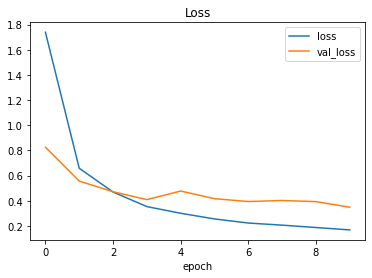

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

print(type(history.history))

Text(0.5, 0, 'epoch')

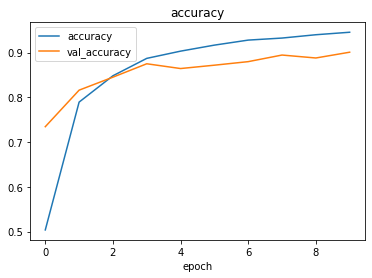

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')

In [ ]:
score = model.evaluate(x_test,y_test,verbose =0)
print(type(score))
print('Test Score:',score[0])
print('Test Accuracy:',score[1])

<class 'list'>
Test Score: 0.48719422698304093
Test Accuracy: 0.8886777758598328
